In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r England_2020

In [5]:
England_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
14,14,MM Ali (ENG),5,4,1,24,17*,8.00,37,64.86,...,216,1,1/42,216.00,4.80,270.0,0,0,0,0
20,20,JC Archer (ENG),3,2,2,14,8*,-,12,116.66,...,151,7,3/34,21.57,5.20,24.8,0,0,1,0
24,24,JM Bairstow (ENG),9,8,0,346,112,43.25,343,100.87,...,-,-,-,-,-,-,-,-,5,0
26,26,T Banton (ENG),6,5,0,134,58,26.80,145,92.41,...,-,-,-,-,-,-,-,-,2,0
33,33,SW Billings (ENG),6,6,2,315,118,78.75,329,95.74,...,-,-,-,-,-,-,-,-,3,0
40,40,JC Buttler (ENG),3,3,0,12,8,4.00,31,38.70,...,-,-,-,-,-,-,-,-,6,1
53,53,SM Curran (ENG),3,2,0,8,7,4.00,23,34.78,...,79,3,3/35,26.33,4.93,32.0,0,0,0,0
54,54,TK Curran (ENG),7,5,2,114,38*,38.00,139,82.01,...,261,1,1/37,261.00,5.11,306.0,0,0,1,0
59,59,JL Denly (ENG),3,2,0,153,87,76.50,182,84.06,...,41,0,-,-,6.83,-,0,0,0,0
101,101,CJ Jordan (ENG),3,2,2,1,1*,-,5,20.00,...,90,2,1/0,45.00,6.27,43.0,0,0,0,0


In [6]:
England_2020=England_2020.reset_index()

In [7]:
England_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,14,14,MM Ali (ENG),5,4,1,24,17*,8.00,37,...,216,1,1/42,216.00,4.80,270.0,0,0,0,0
1,20,20,JC Archer (ENG),3,2,2,14,8*,-,12,...,151,7,3/34,21.57,5.20,24.8,0,0,1,0
2,24,24,JM Bairstow (ENG),9,8,0,346,112,43.25,343,...,-,-,-,-,-,-,-,-,5,0
3,26,26,T Banton (ENG),6,5,0,134,58,26.80,145,...,-,-,-,-,-,-,-,-,2,0
4,33,33,SW Billings (ENG),6,6,2,315,118,78.75,329,...,-,-,-,-,-,-,-,-,3,0
5,40,40,JC Buttler (ENG),3,3,0,12,8,4.00,31,...,-,-,-,-,-,-,-,-,6,1
6,53,53,SM Curran (ENG),3,2,0,8,7,4.00,23,...,79,3,3/35,26.33,4.93,32.0,0,0,0,0
7,54,54,TK Curran (ENG),7,5,2,114,38*,38.00,139,...,261,1,1/37,261.00,5.11,306.0,0,0,1,0
8,59,59,JL Denly (ENG),3,2,0,153,87,76.50,182,...,41,0,-,-,6.83,-,0,0,0,0
9,101,101,CJ Jordan (ENG),3,2,2,1,1*,-,5,...,90,2,1/0,45.00,6.27,43.0,0,0,0,0


In [8]:
England_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
England_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),5,4,1,24,17*,8.00,37,64.86,0,...,216,1,1/42,216.00,4.80,270.0,0,0,0,0
1,JC Archer (ENG),3,2,2,14,8*,-,12,116.66,0,...,151,7,3/34,21.57,5.20,24.8,0,0,1,0
2,JM Bairstow (ENG),9,8,0,346,112,43.25,343,100.87,1,...,-,-,-,-,-,-,-,-,5,0
3,T Banton (ENG),6,5,0,134,58,26.80,145,92.41,0,...,-,-,-,-,-,-,-,-,2,0
4,SW Billings (ENG),6,6,2,315,118,78.75,329,95.74,1,...,-,-,-,-,-,-,-,-,3,0
5,JC Buttler (ENG),3,3,0,12,8,4.00,31,38.70,0,...,-,-,-,-,-,-,-,-,6,1
6,SM Curran (ENG),3,2,0,8,7,4.00,23,34.78,0,...,79,3,3/35,26.33,4.93,32.0,0,0,0,0
7,TK Curran (ENG),7,5,2,114,38*,38.00,139,82.01,0,...,261,1,1/37,261.00,5.11,306.0,0,0,1,0
8,JL Denly (ENG),3,2,0,153,87,76.50,182,84.06,0,...,41,0,-,-,6.83,-,0,0,0,0
9,CJ Jordan (ENG),3,2,2,1,1*,-,5,20.00,0,...,90,2,1/0,45.00,6.27,43.0,0,0,0,0


In [10]:
England_2020_players =England_2020.copy()

In [11]:
England_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
England_2020_players.HS=England_2020_players.HS.str.extract('(\d+)')
England_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
England_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,4,1,24,17,8.00,37,64.86,0,0,...,216,1,1/42,216.00,4.80,270.0,0,0,0,0
1,3,2,2,14,8,-,12,116.66,0,0,...,151,7,3/34,21.57,5.20,24.8,0,0,1,0
2,9,8,0,346,112,43.25,343,100.87,1,2,...,-,-,-,-,-,-,-,-,5,0
3,6,5,0,134,58,26.80,145,92.41,0,1,...,-,-,-,-,-,-,-,-,2,0
4,6,6,2,315,118,78.75,329,95.74,1,2,...,-,-,-,-,-,-,-,-,3,0
5,3,3,0,12,8,4.00,31,38.70,0,0,...,-,-,-,-,-,-,-,-,6,1
6,3,2,0,8,7,4.00,23,34.78,0,0,...,79,3,3/35,26.33,4.93,32.0,0,0,0,0
7,7,5,2,114,38,38.00,139,82.01,0,0,...,261,1,1/37,261.00,5.11,306.0,0,0,1,0
8,3,2,0,153,87,76.50,182,84.06,0,2,...,41,0,-,-,6.83,-,0,0,0,0
9,3,2,2,1,1,-,5,20.00,0,0,...,90,2,1/0,45.00,6.27,43.0,0,0,0,0


In [14]:
England_2020_players.replace("-",0,inplace=True)

In [15]:
England_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

England_2020_players_scaled = pd.DataFrame(scaler.fit_transform(England_2020_players),columns=England_2020_players.columns)
England_2020_players_scaled.shape
England_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.119381,0.171499,0.398862,-0.673715,-0.583529,-0.631129,-0.624901,-0.131324,-0.408248,-0.588348,...,-0.641219,1.213938,-0.490339,2.650319,0.442280,2.772581,0.0,-0.223607,-0.869652,-0.223607
1,-0.716285,-0.628828,1.595448,-0.772860,-0.823283,-0.916446,-0.867558,1.254130,-0.408248,-0.588348,...,0.776212,0.547127,1.326800,-0.253606,0.606305,-0.268611,0.0,-0.223607,-0.239904,-0.223607
2,1.790712,1.772152,-0.797724,2.518759,1.947211,0.626051,2.345227,0.831807,2.449490,2.157277,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,2.279089,-0.223607
3,0.537214,0.571662,-0.797724,0.416882,0.508685,0.039367,0.423380,0.605534,-0.408248,0.784465,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,0.389844,-0.223607
4,0.537214,0.971825,1.595448,2.211409,2.107047,1.892147,2.209339,0.694599,2.449490,2.157277,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,1.019592,-0.223607


In [17]:
England_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,21.0,2.100000e+01,2.100000e+01,2.100000e+01
mean,-6.344132e-17,-7.401487e-17,7.930164e-17,5.286776e-18,2.114711e-17,-4.229421e-17,3.172066e-17,-2.854859e-16,3.700743e-17,7.401487e-17,...,9.251859e-18,-2.577303e-17,-3.634659e-17,-8.194503e-17,1.559599e-16,5.220692e-17,0.0,-6.608470e-17,6.608470e-17,-7.401487e-17
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,...,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,0.0,1.024695e+00,1.024695e+00,1.024695e+00
min,-1.551951e+00,-1.429155e+00,-7.977240e-01,-9.116632e-01,-1.036398e+00,-9.164462e-01,-9.840339e-01,-1.866083e+00,-4.082483e-01,-5.883484e-01,...,-6.412189e-01,-1.001927e+00,-7.931959e-01,-5.757667e-01,-1.526014e+00,-5.762035e-01,0.0,-2.236068e-01,-8.696522e-01,-2.236068e-01
25%,-7.162850e-01,-6.288281e-01,-7.977240e-01,-7.926891e-01,-8.232833e-01,-7.737875e-01,-8.384394e-01,-8.310047e-01,-4.082483e-01,-5.883484e-01,...,-6.412189e-01,-1.001927e+00,-7.931959e-01,-5.757667e-01,-1.526014e+00,-5.762035e-01,0.0,-2.236068e-01,-8.696522e-01,-2.236068e-01
50%,-2.984521e-01,-2.286648e-01,-7.977240e-01,-3.465359e-01,-1.839385e-01,-2.509434e-01,-3.531244e-01,3.822033e-01,-4.082483e-01,-5.883484e-01,...,-6.412189e-01,-1.914945e-01,-4.903393e-01,-1.825128e-01,4.955884e-01,-1.793106e-01,0.0,-2.236068e-01,-2.399041e-01,-2.236068e-01
75%,5.372137e-01,5.716620e-01,3.988620e-01,3.673092e-01,3.754882e-01,4.388113e-01,4.233795e-01,7.456843e-01,-4.082483e-01,7.844645e-01,...,6.749673e-02,5.471272e-01,4.182306e-01,-1.078349e-01,6.760154e-01,-8.752907e-02,0.0,-2.236068e-01,-2.399041e-01,-2.236068e-01
max,1.790712e+00,1.772152e+00,1.595448e+00,2.518759e+00,2.107047e+00,2.578692e+00,2.345227e+00,1.254130e+00,2.449490e+00,2.157277e+00,...,2.193644e+00,2.711699e+00,2.841083e+00,3.322420e+00,1.274705e+00,3.219085e+00,0.0,4.472136e+00,2.908837e+00,4.472136e+00


In [18]:
X =  England_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 1.19380825e-01,  1.71498585e-01,  3.98862018e-01,
        -6.73714879e-01, -5.83528971e-01, -6.31128822e-01,
        -6.24900802e-01, -1.31323891e-01, -4.08248290e-01,
        -5.88348405e-01,  1.30558242e+00, -5.65478065e-01,
        -6.76416637e-01, -1.29101143e+00,  1.19380825e-01,
         1.14946100e+00,  1.35615971e+00, -6.41218942e-01,
         1.21393849e+00, -4.90339283e-01,  2.65031904e+00,
         4.42280464e-01,  2.77258083e+00,  0.00000000e+00,
        -2.23606798e-01, -8.69652209e-01, -2.23606798e-01],
       [-7.16284952e-01, -6.28828146e-01,  1.59544807e+00,
        -7.72860026e-01, -8.23283266e-01, -9.16446195e-01,
        -8.67558288e-01,  1.25412979e+00, -4.08248290e-01,
        -5.88348405e-01, -5.22232968e-01, -7.31562531e-01,
        -6.76416637e-01, -1.22234641e+00, -7.16284952e-01,
         2.38567377e-01,  5.18993326e-01,  7.76212403e-01,
         5.47127209e-01,  1.32680041e+00, -2.53606184e-01,
         6.06305007e-01, -2.68611487e-01,  0.00000000e+

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(England_2020_players_scaled))

False

In [23]:
England_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.119381,0.171499,0.398862,-0.673715,-0.583529,-0.631129,-0.624901,-0.131324,-0.408248,-0.588348,...,-0.641219,1.213938,-0.490339,2.650319,0.442280,2.772581,0.0,-0.223607,-0.869652,-0.223607
1,-0.716285,-0.628828,1.595448,-0.772860,-0.823283,-0.916446,-0.867558,1.254130,-0.408248,-0.588348,...,0.776212,0.547127,1.326800,-0.253606,0.606305,-0.268611,0.0,-0.223607,-0.239904,-0.223607
2,1.790712,1.772152,-0.797724,2.518759,1.947211,0.626051,2.345227,0.831807,2.449490,2.157277,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,2.279089,-0.223607
3,0.537214,0.571662,-0.797724,0.416882,0.508685,0.039367,0.423380,0.605534,-0.408248,0.784465,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,0.389844,-0.223607
4,0.537214,0.971825,1.595448,2.211409,2.107047,1.892147,2.209339,0.694599,2.449490,2.157277,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,1.019592,-0.223607
5,-0.716285,-0.228665,-0.797724,-0.792689,-0.823283,-0.773788,-0.683139,-0.831005,-0.408248,-0.588348,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,2.908837,4.472136
6,-0.716285,-0.628828,-0.797724,-0.832347,-0.849923,-0.773788,-0.760789,-0.935850,-0.408248,-0.588348,...,-0.641219,-0.191495,0.115374,-0.182513,0.495588,-0.179311,0.0,-0.223607,-0.869652,-0.223607
7,0.955047,0.571662,1.595448,0.218591,-0.024102,0.438811,0.365142,0.327374,-0.408248,-0.588348,...,2.193644,1.675577,-0.490339,3.322420,0.569399,3.219085,0.0,-0.223607,-0.239904,-0.223607
8,-0.716285,-0.628828,-0.797724,0.605258,1.281227,1.811901,0.782513,0.382203,-0.408248,2.157277,...,-0.641219,-0.581323,-0.793196,-0.575767,1.274705,-0.576204,0.0,-0.223607,-0.869652,-0.223607
9,-0.716285,-0.628828,1.595448,-0.901749,-1.009759,-0.916446,-0.935502,-1.331159,-0.408248,-0.588348,...,-0.641219,-0.078650,-0.187483,0.096335,1.045071,-0.042879,0.0,-0.223607,-0.869652,-0.223607


In [24]:
np.all(np.isfinite(England_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


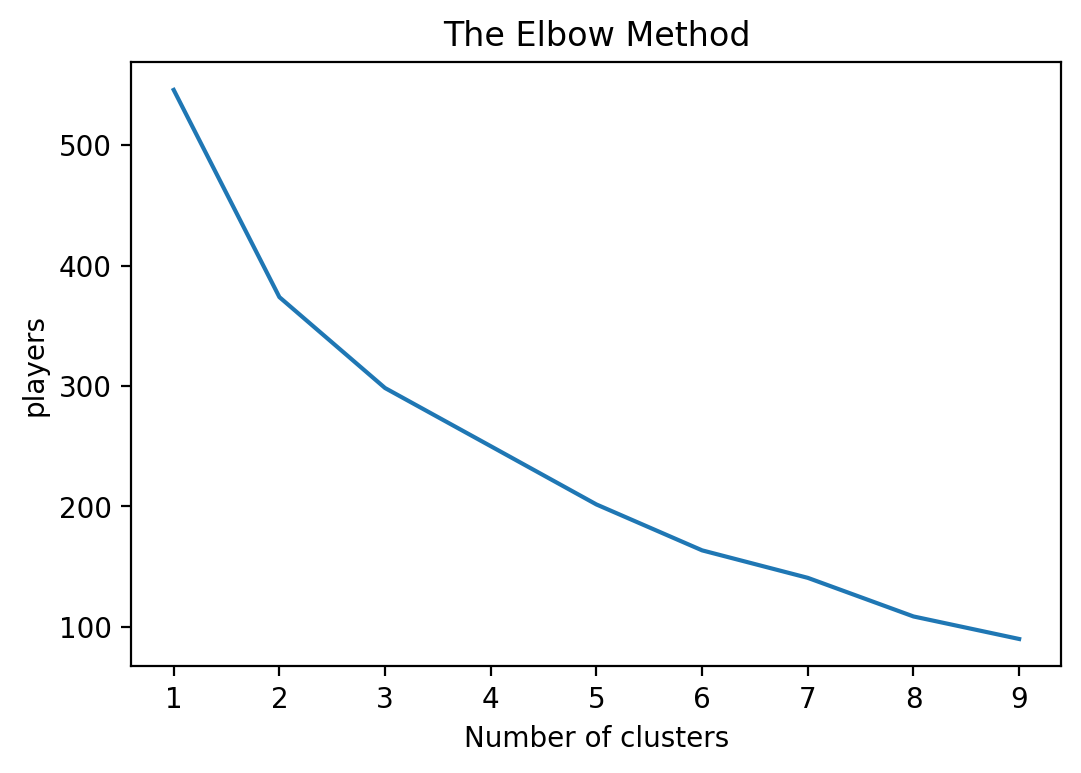

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[ 0.06715171,  0.02143732,  0.54843527, -0.05157908,  0.08911502,
         0.43595815, -0.01340394,  0.57504352, -0.40824829,  0.09805807,
        -0.06527912, -0.22292885, -0.07011636,  0.01076297,  0.06715171,
         0.86480674,  0.91533929,  0.68762294,  0.92156739,  0.72108718,
         0.55689185,  0.65243691,  0.55122054,  0.        ,  0.36336105,
        -0.47605961, -0.2236068 ],
       [ 1.28931291,  1.37198868, -0.0797724 ,  1.36272644,  1.2332758 ,
         0.49059643,  1.32606539,  0.66860176,  1.30639453,  0.78446454,
         0.94001934,  1.46075243,  1.19445279, -0.47618649,  1.28931291,
        -1.12777305, -0.99837074, -0.64121894, -1.0019267 , -0.7931959 ,
        -0.57576669, -1.52601405, -0.57620353,  0.        , -0.2236068 ,
         0.89364261, -0.2236068 ],
       [-0.87297229, -0.87893025, -0.49857752, -0.80012494, -0.85991239,
        -0.74258092, -0.81538693, -0.99291961, -0.40824829, -0.58834841,
        -0.52223297, -0.69004141, -0.67641664,  0.2868

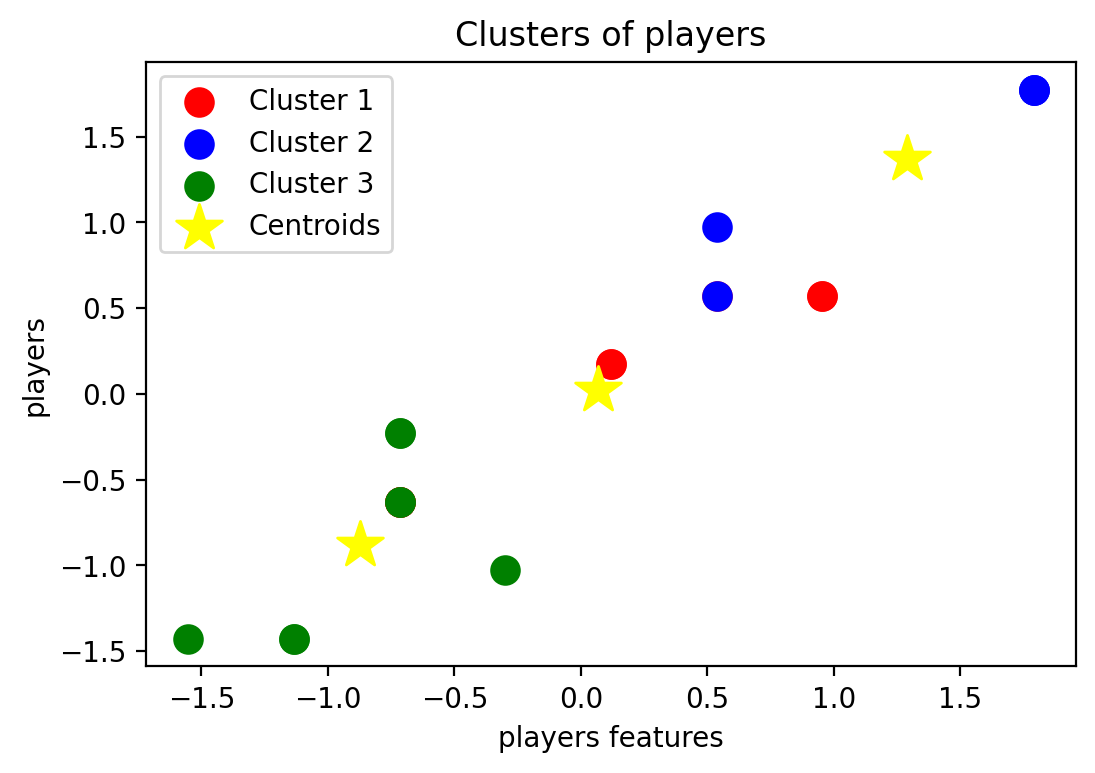

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
England_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),5,4,1,24,17*,8.00,37,64.86,0,...,216,1,1/42,216.00,4.80,270.0,0,0,0,0
1,JC Archer (ENG),3,2,2,14,8*,-,12,116.66,0,...,151,7,3/34,21.57,5.20,24.8,0,0,1,0
2,JM Bairstow (ENG),9,8,0,346,112,43.25,343,100.87,1,...,-,-,-,-,-,-,-,-,5,0
3,T Banton (ENG),6,5,0,134,58,26.80,145,92.41,0,...,-,-,-,-,-,-,-,-,2,0
4,SW Billings (ENG),6,6,2,315,118,78.75,329,95.74,1,...,-,-,-,-,-,-,-,-,3,0
5,JC Buttler (ENG),3,3,0,12,8,4.00,31,38.70,0,...,-,-,-,-,-,-,-,-,6,1
6,SM Curran (ENG),3,2,0,8,7,4.00,23,34.78,0,...,79,3,3/35,26.33,4.93,32.0,0,0,0,0
7,TK Curran (ENG),7,5,2,114,38*,38.00,139,82.01,0,...,261,1,1/37,261.00,5.11,306.0,0,0,1,0
8,JL Denly (ENG),3,2,0,153,87,76.50,182,84.06,0,...,41,0,-,-,6.83,-,0,0,0,0
9,CJ Jordan (ENG),3,2,2,1,1*,-,5,20.00,0,...,90,2,1/0,45.00,6.27,43.0,0,0,0,0


In [31]:
England_2020["cluster"] = y_kmeans

In [32]:
England_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),5,4,1,24,17*,8.00,37,64.86,0,...,1,1/42,216.00,4.80,270.0,0,0,0,0,0
1,JC Archer (ENG),3,2,2,14,8*,-,12,116.66,0,...,7,3/34,21.57,5.20,24.8,0,0,1,0,0
2,JM Bairstow (ENG),9,8,0,346,112,43.25,343,100.87,1,...,-,-,-,-,-,-,-,5,0,1
3,T Banton (ENG),6,5,0,134,58,26.80,145,92.41,0,...,-,-,-,-,-,-,-,2,0,1
4,SW Billings (ENG),6,6,2,315,118,78.75,329,95.74,1,...,-,-,-,-,-,-,-,3,0,1
5,JC Buttler (ENG),3,3,0,12,8,4.00,31,38.70,0,...,-,-,-,-,-,-,-,6,1,2
6,SM Curran (ENG),3,2,0,8,7,4.00,23,34.78,0,...,3,3/35,26.33,4.93,32.0,0,0,0,0,2
7,TK Curran (ENG),7,5,2,114,38*,38.00,139,82.01,0,...,1,1/37,261.00,5.11,306.0,0,0,1,0,0
8,JL Denly (ENG),3,2,0,153,87,76.50,182,84.06,0,...,0,-,-,6.83,-,0,0,0,0,0
9,CJ Jordan (ENG),3,2,2,1,1*,-,5,20.00,0,...,2,1/0,45.00,6.27,43.0,0,0,0,0,2


In [33]:
England_2020['cluster'].value_counts()

0    8
2    8
1    5
Name: cluster, dtype: int64

In [34]:
England_Cluster_2020 = np.array([8,5,8])

In [35]:
England_Cluster_2020

array([8, 5, 8])

In [36]:
%store England_Cluster_2020

Stored 'England_Cluster_2020' (ndarray)


In [37]:
England_2020_players_scaled.insert(0, 'Player', England_2020.Player)

In [38]:
England_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),0.119381,0.171499,0.398862,-0.673715,-0.583529,-0.631129,-0.624901,-0.131324,-0.408248,...,-0.641219,1.213938,-0.490339,2.650319,0.442280,2.772581,0.0,-0.223607,-0.869652,-0.223607
1,JC Archer (ENG),-0.716285,-0.628828,1.595448,-0.772860,-0.823283,-0.916446,-0.867558,1.254130,-0.408248,...,0.776212,0.547127,1.326800,-0.253606,0.606305,-0.268611,0.0,-0.223607,-0.239904,-0.223607
2,JM Bairstow (ENG),1.790712,1.772152,-0.797724,2.518759,1.947211,0.626051,2.345227,0.831807,2.449490,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,2.279089,-0.223607
3,T Banton (ENG),0.537214,0.571662,-0.797724,0.416882,0.508685,0.039367,0.423380,0.605534,-0.408248,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,0.389844,-0.223607
4,SW Billings (ENG),0.537214,0.971825,1.595448,2.211409,2.107047,1.892147,2.209339,0.694599,2.449490,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,1.019592,-0.223607
5,JC Buttler (ENG),-0.716285,-0.228665,-0.797724,-0.792689,-0.823283,-0.773788,-0.683139,-0.831005,-0.408248,...,-0.641219,-1.001927,-0.793196,-0.575767,-1.526014,-0.576204,0.0,-0.223607,2.908837,4.472136
6,SM Curran (ENG),-0.716285,-0.628828,-0.797724,-0.832347,-0.849923,-0.773788,-0.760789,-0.935850,-0.408248,...,-0.641219,-0.191495,0.115374,-0.182513,0.495588,-0.179311,0.0,-0.223607,-0.869652,-0.223607
7,TK Curran (ENG),0.955047,0.571662,1.595448,0.218591,-0.024102,0.438811,0.365142,0.327374,-0.408248,...,2.193644,1.675577,-0.490339,3.322420,0.569399,3.219085,0.0,-0.223607,-0.239904,-0.223607
8,JL Denly (ENG),-0.716285,-0.628828,-0.797724,0.605258,1.281227,1.811901,0.782513,0.382203,-0.408248,...,-0.641219,-0.581323,-0.793196,-0.575767,1.274705,-0.576204,0.0,-0.223607,-0.869652,-0.223607
9,CJ Jordan (ENG),-0.716285,-0.628828,1.595448,-0.901749,-1.009759,-0.916446,-0.935502,-1.331159,-0.408248,...,-0.641219,-0.078650,-0.187483,0.096335,1.045071,-0.042879,0.0,-0.223607,-0.869652,-0.223607


In [39]:
England_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MM Ali (ENG),-0.631129,2.650319
1,JC Archer (ENG),-0.916446,-0.253606
2,JM Bairstow (ENG),0.626051,-0.575767
3,T Banton (ENG),0.039367,-0.575767
4,SW Billings (ENG),1.892147,-0.575767
5,JC Buttler (ENG),-0.773788,-0.575767
6,SM Curran (ENG),-0.773788,-0.182513
7,TK Curran (ENG),0.438811,3.322420
8,JL Denly (ENG),1.811901,-0.575767
9,CJ Jordan (ENG),-0.916446,0.096335


In [40]:
England_2020_Ave=England_2020_players_scaled.mean()

In [41]:
England_2020_Ave

Mat_x          -6.344132e-17
Inns_x         -7.401487e-17
NO              7.930164e-17
Runs_x          5.286776e-18
HS              2.114711e-17
Ave_x          -4.229421e-17
BF              3.172066e-17
SR_x           -2.854859e-16
100             3.700743e-17
50              7.401487e-17
0               5.286776e-17
4s             -3.700743e-17
6s             -3.172066e-17
Unnamed: 0_y    1.057355e-17
Mat_y          -6.344132e-17
Inns_y         -6.872809e-17
Overs           8.301891e-17
Mdns            9.251859e-18
Runs_y         -2.577303e-17
Wkts           -3.634659e-17
Ave_y          -8.194503e-17
Econ            1.559599e-16
SR_y            5.220692e-17
4               0.000000e+00
5              -6.608470e-17
Ct              6.608470e-17
St             -7.401487e-17
dtype: float64

In [42]:
England_Ave_2020 =England_2020_Ave[['Ave_x','Ave_y']]

In [43]:
England_Ave_2020

Ave_x   -4.229421e-17
Ave_y   -8.194503e-17
dtype: float64

In [44]:
England_Ave_2020 = np.array([England_Ave_2020.Ave_x, England_Ave_2020.Ave_y])

In [45]:
England_Ave_2020

array([-4.22942105e-17, -8.19450328e-17])

In [46]:
%store England_Ave_2020

Stored 'England_Ave_2020' (ndarray)


In [47]:
England_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),5,4,1,24,17*,8.00,37,64.86,0,...,1,1/42,216.00,4.80,270.0,0,0,0,0,0
1,JC Archer (ENG),3,2,2,14,8*,-,12,116.66,0,...,7,3/34,21.57,5.20,24.8,0,0,1,0,0
2,JM Bairstow (ENG),9,8,0,346,112,43.25,343,100.87,1,...,-,-,-,-,-,-,-,5,0,1
3,T Banton (ENG),6,5,0,134,58,26.80,145,92.41,0,...,-,-,-,-,-,-,-,2,0,1
4,SW Billings (ENG),6,6,2,315,118,78.75,329,95.74,1,...,-,-,-,-,-,-,-,3,0,1
5,JC Buttler (ENG),3,3,0,12,8,4.00,31,38.70,0,...,-,-,-,-,-,-,-,6,1,2
6,SM Curran (ENG),3,2,0,8,7,4.00,23,34.78,0,...,3,3/35,26.33,4.93,32.0,0,0,0,0,2
7,TK Curran (ENG),7,5,2,114,38*,38.00,139,82.01,0,...,1,1/37,261.00,5.11,306.0,0,0,1,0,0
8,JL Denly (ENG),3,2,0,153,87,76.50,182,84.06,0,...,0,-,-,6.83,-,0,0,0,0,0
9,CJ Jordan (ENG),3,2,2,1,1*,-,5,20.00,0,...,2,1/0,45.00,6.27,43.0,0,0,0,0,2
